# Data Analysis and Visualization for Crime in LA

**<font color=red>Task:<font color=red>** Analyzing crime data to identify patterns in criminal behavior.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crimes = pd.read_csv("/Users/daphne/Documents/csv_file/crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head(10)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST
5,221216052,2022-07-07,2020-02-23,1000,77th Street,THEFT OF IDENTITY,28,F,B,NaN,Invest Cont,500 W 75TH ST
6,221515929,2022-10-10,2020-04-01,1200,N Hollywood,THEFT OF IDENTITY,33,M,W,NaN,Invest Cont,5700 CARTWRIGHT AV
7,231906599,2023-03-03,2020-01-14,1335,Mission,THEFT OF IDENTITY,35,M,O,NaN,Invest Cont,14500 WILLOWGREEN LN
8,231207476,2023-02-27,2020-08-15,0001,77th Street,BURGLARY,72,M,B,NaN,Invest Cont,8800 HAAS AV
9,231506571,2023-03-03,2020-07-15,1700,N Hollywood,OTHER MISCELLANEOUS CRIME,21,F,W,VERBAL THREAT,Invest Cont,12300 EMELITA ST


#### ▶ Which hour has the highest frequency of crimes? 

12


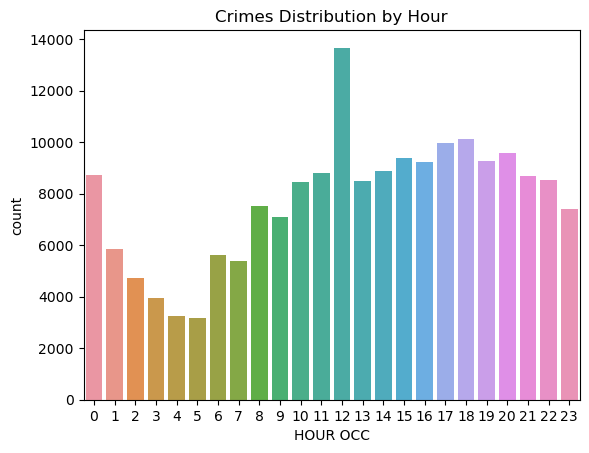

In [3]:
# extracting the hours
crimes['HOUR OCC'] = crimes['TIME OCC'].str[:2].astype('int')
crimes['crime_by_hour'] = crimes.groupby('HOUR OCC')['DR_NO'].transform('count')
peak_crime_hour = crimes.sort_values('crime_by_hour',ascending=False)['HOUR OCC'].iloc[0]

#print out the peak_crime_hour
print(peak_crime_hour)

# Plot the frequency
sns.countplot(data=crimes, x='HOUR OCC')
plt.title('Crimes Distribution by Hour')
plt.show()

#### ▶ Which area has the largest frequency of night crimes?
###### (night crimes:crimes committed between 10pm and 3:59am)

Central


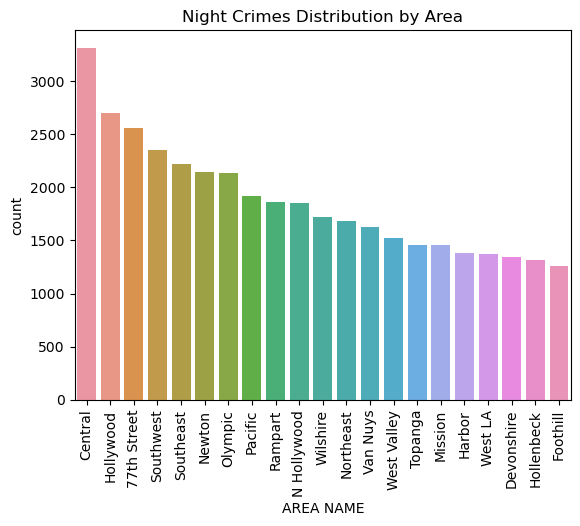

In [4]:
# subsetting for night hours
night_crimes = crimes[((crimes['HOUR OCC']>=22) & (crimes['HOUR OCC']<=24)) | ((crimes['HOUR OCC']>=0) & (crimes['HOUR OCC']<4))]

# Counting crime by area
night_crimes = night_crimes.copy()
night_crime_counts_by_area = night_crimes['AREA NAME'].value_counts()
sorted_crime = night_crime_counts_by_area.index
peak_night_crime_location = sorted_crime[0]
print(peak_night_crime_location)

# Plot the frequency
sns.countplot(data=night_crimes, x='AREA NAME', order=sorted_crime)
plt.title('Night Crimes Distribution by Area')
plt.xticks(rotation=90)
plt.show()

#### ▶ Identify the number of crimes committed against victims of different age groups.
Requiremwnt : Save as a pandas Series called victim_ages, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.

Age Bracket
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: DR_NO, dtype: int64


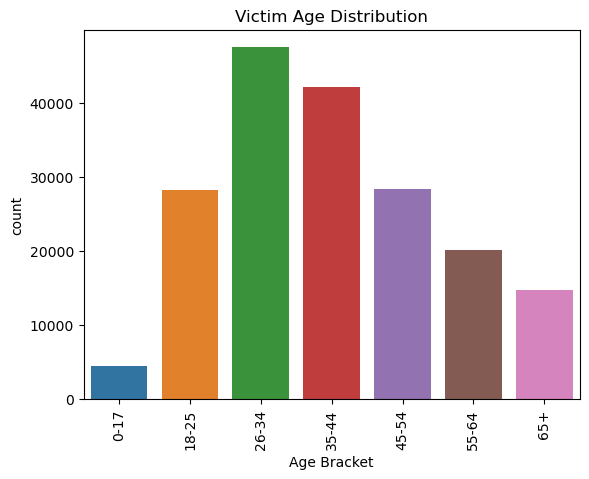

In [5]:
# import warnings filter
from warnings import simplefilter

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Creating bins and labels
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']

# using pd.cut() to bin values into discrete intervals
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"],
                               bins=age_bins,
                               labels=age_labels)

victim_ages = crimes.groupby('Age Bracket')['DR_NO'].count()
print(victim_ages)

# Plot the frequency
sns.countplot(data=crimes, x='Age Bracket')
plt.title('Victim Age Distribution')
plt.xticks(rotation=90)
plt.show()

#### ▶ Identify overall percentage of victim gender. 

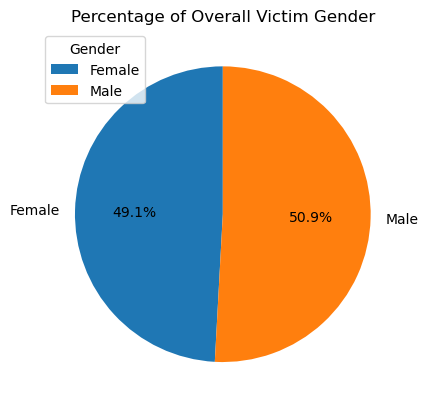

In [6]:
# remove unknown label in column 'Vict Sex'
# make gender lable more clear
crimes_new = crimes[crimes['Vict Sex']!='H']
crimes_new.loc[:,'Vict Sex'] = crimes["Vict Sex"].map({"F":"Female", "M":"Male"})

# plot the pie chart
gender_counts = crimes_new.groupby('Vict Sex').size()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Overall Victim Gender')
plt.legend(title='Gender')
plt.show()

#### ▶ Identify the gender distribution over different age brackets.

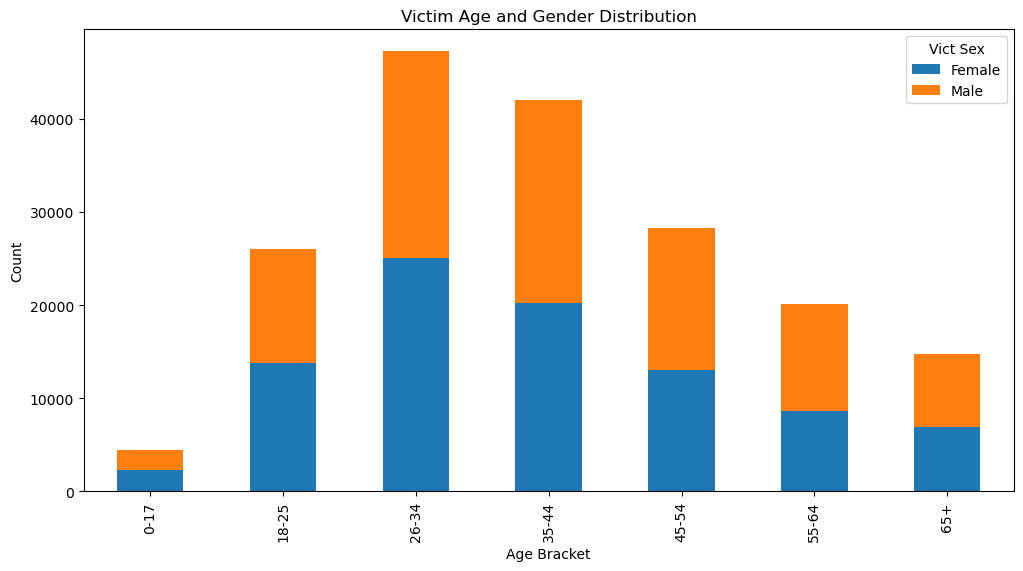

In [7]:
# group the age and gender to calculate the count of crimes
age_gender_counts = crimes_new.groupby(['Age Bracket', 'Vict Sex']).size().unstack()

# plot the stacked bar chart
age_gender_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Victim Age and Gender Distribution')
plt.xlabel('Age Bracket')
plt.ylabel('Count')
plt.show()

#### ▶ Identify the age distribution over different descent.

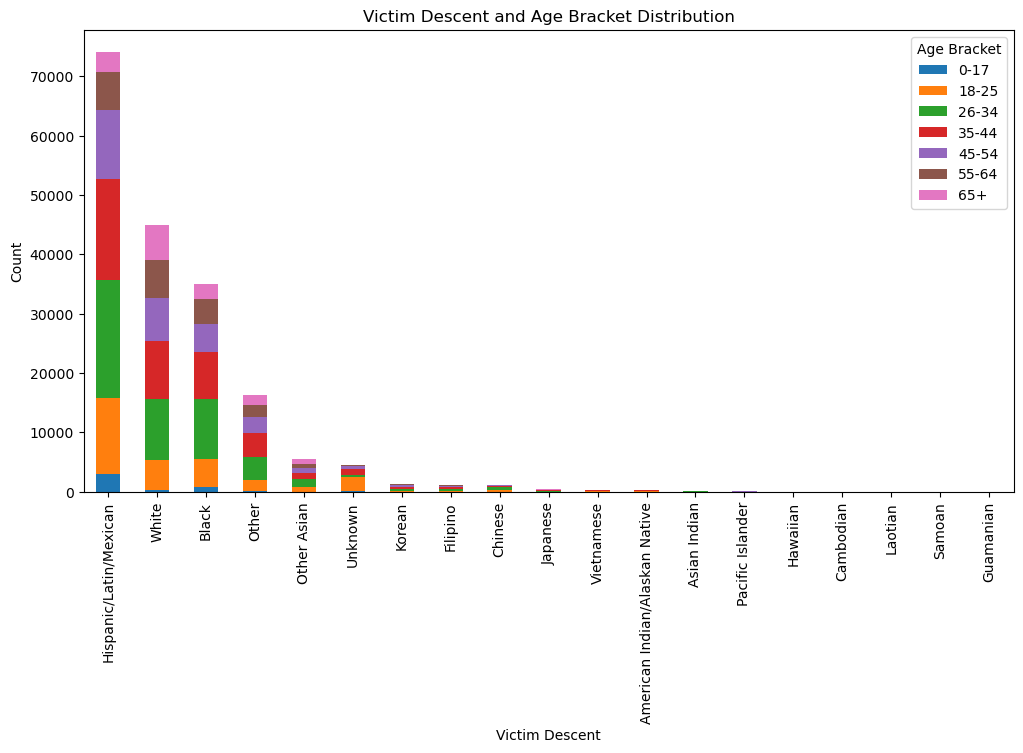

In [8]:
# map the label with the full name of victom descent
crimes_new.loc[:,'Vict Descent'] = crimes["Vict Descent"].map({"A":"Other Asian",
                                                               "B":"Black",
                                                               "C":"Chinese",
                                                               "D":"Cambodian",
                                                               "F":"Filipino",
                                                               "G":"Guamanian",                                                       
                                                               "H":"Hispanic/Latin/Mexican", "W":"White",
                                                               "I":"American Indian/Alaskan Native",
                                                               "J":"Japanese",
                                                               "K":"Korean",
                                                               "L":"Laotian",
                                                               "O":"Other",
                                                               "P":"Pacific Islander",
                                                               "S":"Samoan",
                                                               "U":"Hawaiian",
                                                               "V":"Vietnamese",
                                                               "W":"White",
                                                               "X":"Unknown",
                                                               "Z":"Asian Indian"
                                                              })

# sort and calculate the count of crimes by victim descent
age_descent_counts = crimes_new.groupby(['Vict Descent', 'Age Bracket']).size().unstack()
age_descent_counts.loc[:,'total_num'] = age_descent_counts.sum(axis=1)
age_descent_counts = age_descent_counts.sort_values('total_num', ascending=False)

# plot the stacked bar chart
del age_descent_counts['total_num']
age_descent_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Victim Descent and Age Bracket Distribution')
plt.xlabel('Victim Descent')
plt.ylabel('Count')
plt.show()